# AUTHOR

![world_bank_photo](world_bank_photo.jpg)


# BUSINESS PROBLEM

# DATA UNDERSTANDING

# EXPLORATORY DATA ANALYSIS

## 1. Unemployment, total (% of total labor force) (modeled ILO estimate)


In [ ]:
# Call the function with the appropriate file paths and year
read_and_visualize_data("DATASETS/Access to electricity (% of population)",
                     "API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     '2021')


### Observations

## 2. GDP growth (annual %)


In [ ]:
# Call the function with the appropriate file paths and year
read_and_visualize_data("DATASETS/Access to electricity (% of population)",
                     "API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     '2021')


### Observations

## 3. Access to electricity (% of population)


In [ ]:
# Call the function with the appropriate file paths and year
read_and_visualize_data("DATASETS/Access to electricity (% of population)",
                     "API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     '2021')


### Observations

## 4. Individuals using the Internet (% of population)


In [ ]:
# Call the function with the appropriate file paths and year
read_and_visualize_data("DATASETS/Access to electricity (% of population)",
                     "API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     '2021')


### Observations

## 5. Life expectancy at birth, total (years)


In [ ]:
# Call the function with the appropriate file paths and year
read_and_visualize_data("DATASETS/Access to electricity (% of population)",
                     "API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     '2021')


### Observations

## 6. Poverty headcount ratio at \$2.15 a day (2017 PPP) (% of population)


In [ ]:
# Call the function with the appropriate file paths and year
read_and_visualize_data("DATASETS/Access to electricity (% of population)",
                     "API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     '2021')


### Observations

## 7. Urban population (% of total population)


In [ ]:
# Call the function with the appropriate file paths and year
read_and_visualize_data("DATASETS/Access to electricity (% of population)",
                     "API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     '2021')


### Observations

## 8. Literacy rate, adult female (% of females ages 15 and above)


In [ ]:
# Call the function with the appropriate file paths and year
read_and_visualize_data("DATASETS/Access to electricity (% of population)",
                     "API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     '2021')


### Observations

## 9. Literacy rate, adult male (% of males ages 15 and above)


In [ ]:
# Call the function with the appropriate file paths and year
read_and_visualize_data("DATASETS/Access to electricity (% of population)",
                     "API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     '2021')


### Observations

## 10. Tax revenue (% of GDP)


In [ ]:
# Call the function with the appropriate file paths and year
read_and_visualize_data("DATASETS/Access to electricity (% of population)",
                     "API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     '2021')


### Observations

## 11. Population growth (annual %)


In [ ]:
# Call the function with the appropriate file paths and year
read_and_visualize_data("DATASETS/Access to electricity (% of population)",
                     "API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     '2021')


### Observations

## 12. Net migration


In [ ]:
# Call the function with the appropriate file paths and year
read_and_visualize_data("DATASETS/Access to electricity (% of population)",
                     "API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     '2021')


### Observations

## 13. Electric power consumption (kWh per capita)

In [ ]:
# Call the function with the appropriate file paths and year
read_and_visualize_data("DATASETS/Access to electricity (% of population)",
                     "API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     '2021')


### Observations

## 14. Inflation, consumer prices (annual %)

In [ ]:
# Call the function with the appropriate file paths and year
read_and_visualize_data("DATASETS/Access to electricity (% of population)",
                     "API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     '2021')


### Observations

### Observations

### Observations

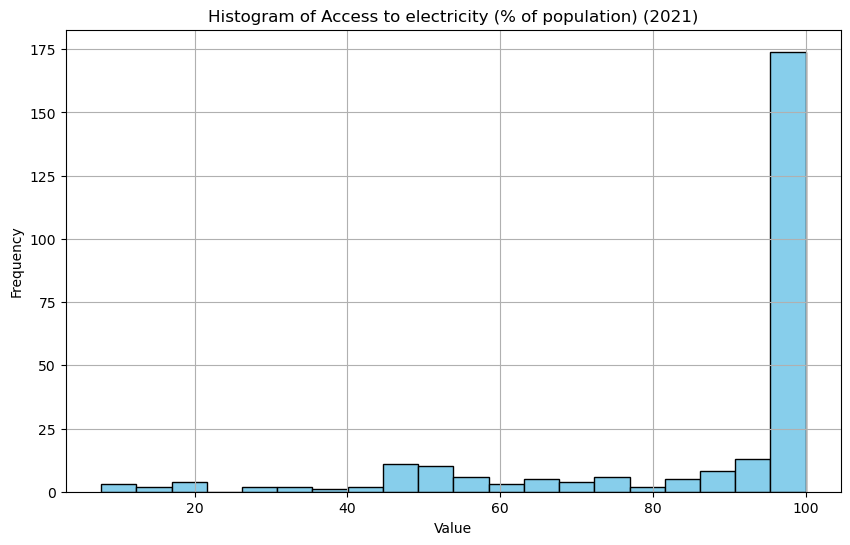

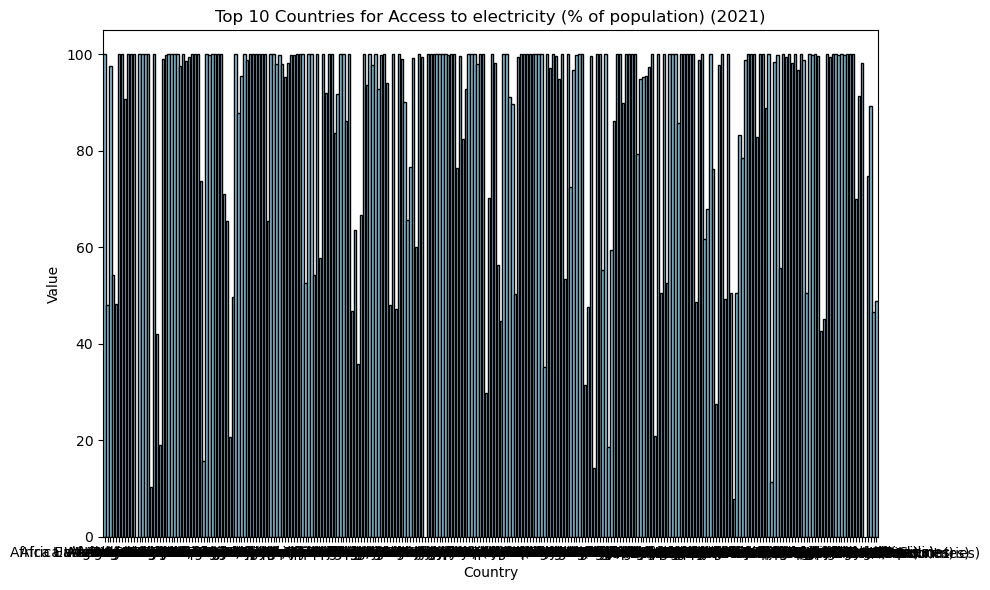

In [21]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

class DataVisualizer:
    def __init__(self, folder_path, data_file, country_metadata_file, indicator_metadata_file, year):
        self.folder_path = folder_path
        self.data_file = data_file
        self.country_metadata_file = country_metadata_file
        self.indicator_metadata_file = indicator_metadata_file
        self.year = year

        self.data = None
        self.country_metadata = None
        self.indicator_name = None

    def read_data(self):
        self.data = pd.read_csv(os.path.join(self.folder_path, self.data_file), skiprows=4)
        self.country_metadata = pd.read_csv(os.path.join(self.folder_path, self.country_metadata_file))
        indicator_metadata = pd.read_csv(os.path.join(self.folder_path, self.indicator_metadata_file))
        self.indicator_name = indicator_metadata['INDICATOR_NAME'][0]

    def create_histogram(self, column_name):
        plt.figure(figsize=(10, 6))
        plt.hist(self.data[column_name], bins=20, color='skyblue', edgecolor='black')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {self.indicator_name} ({self.year})')
        plt.grid()
        plt.show()
        
    def create_bar_plot(self, x_column, y_column, xlabel, ylabel, title, rotation=True):
        plt.figure(figsize=(10, 6))
        plt.bar(self.data[x_column], self.data[y_column], color='skyblue', edgecolor='black')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        if rotation:
            plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def create_bar_plot_seaborn(self, x_column, y_column, xlabel, ylabel, title, rotation=True):
        plt.figure(figsize=(10, 6))
        sns.barplot(data=self.data, x=x_column, y=y_column, color='skyblue', edgecolor='black')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        if rotation:
            plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def create_bar_plot_plotly(self, x_column, y_column, xlabel, ylabel, title, rotation=True):
        fig = px.bar(self.data, x=x_column, y=y_column, color=y_column, title=title)
        if rotation:
            fig.update_layout(xaxis_tickangle=-45)
        fig.show()

    def plot_histogram(self):
        self.create_histogram(self.year)

    def plot_top_10(self, x_column):
        title = f'Top 10 Countries for {self.indicator_name} ({self.year})'
        top_countries_data = self.data.nlargest(10, self.year)[[x_column, self.year]]
        self.create_bar_plot(x_column, self.year, 'Country', 'Value', title, rotation=False)

    def plot_bottom_10(self, x_column):
        title = f'Bottom 10 Countries for {self.indicator_name} ({self.year})'
        bottom_countries_data = self.data.nsmallest(10, self.year)[[x_column, self.year]]
        self.create_bar_plot_seaborn(x_column, self.year, 'Country', 'Value', title, rotation=False)

# Call the class and methods with the appropriate file paths and year
visualizer = DataVisualizer("DATASETS/Access to electricity (% of population)",
                            "API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                            "Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                            "Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                            '2021')  # Change to the desired year

visualizer.read_data()
visualizer.plot_histogram()
visualizer.plot_top_10('Country Name')
visualizer.plot_bottom_10('Country Name')


<Figure size 1000x600 with 0 Axes>

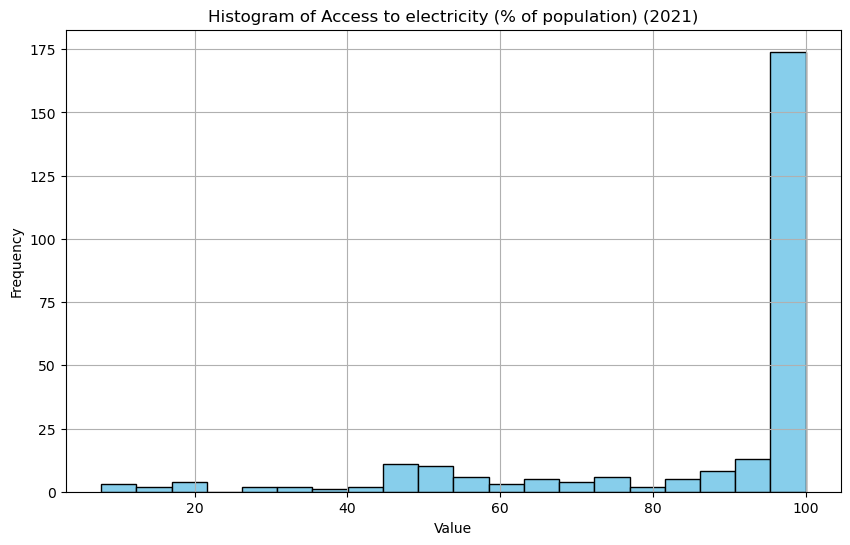

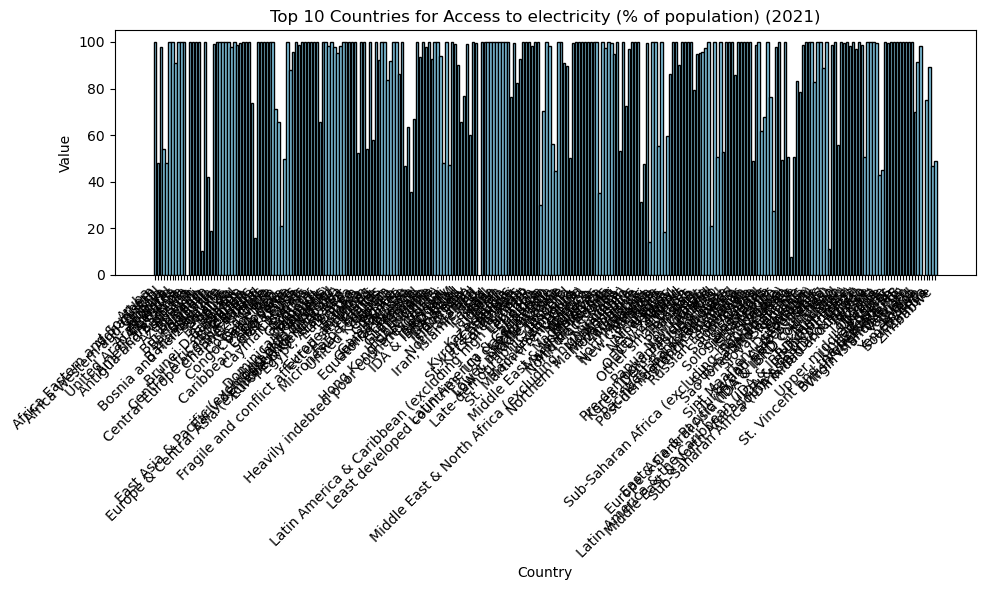

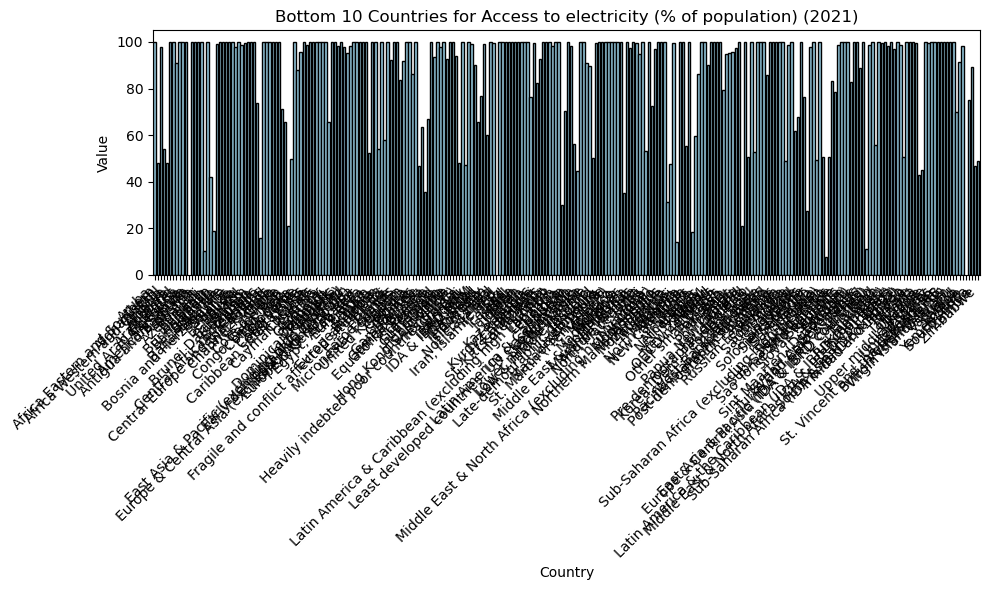

ValueError: Could not interpret input 'IncomeGroup'

In [23]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

class DataVisualizer:
    def __init__(self, folder_path, data_file, country_metadata_file, indicator_metadata_file, year):
        self.folder_path = folder_path
        self.data_file = data_file
        self.country_metadata_file = country_metadata_file
        self.indicator_metadata_file = indicator_metadata_file
        self.year = year

        self.data = None
        self.country_metadata = None
        self.indicator_name = None

    def read_data(self):
        self.data = pd.read_csv(os.path.join(self.folder_path, self.data_file), skiprows=4)
        self.country_metadata = pd.read_csv(os.path.join(self.folder_path, self.country_metadata_file))
        indicator_metadata = pd.read_csv(os.path.join(self.folder_path, self.indicator_metadata_file))
        self.indicator_name = indicator_metadata['INDICATOR_NAME'][0]

    def create_histogram(self, column_name):
        plt.figure(figsize=(10, 6))
        plt.hist(self.data[column_name], bins=20, color='skyblue', edgecolor='black')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {self.indicator_name} ({self.year})')
        plt.grid()
        plt.show()
        
    def create_bar_plot(self, x_column, y_column, xlabel, ylabel, title, rotation=True):
        plt.figure(figsize=(10, 6))
        plt.bar(self.data[x_column], self.data[y_column], color='skyblue', edgecolor='black')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def create_bar_plot_seaborn(self, x_column, y_column, xlabel, ylabel, title, rotation=True):
        plt.figure(figsize=(10, 6))
        sns.barplot(data=self.data, x=x_column, y=y_column, color='skyblue', edgecolor='black')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def create_bar_plot_plotly(self, x_column, y_column, xlabel, ylabel, title, rotation=True):
        fig = px.bar(self.data, x=x_column, y=y_column, color=y_column, title=title)
        if rotation:
            fig.update_layout(xaxis_tickangle=-45)
        fig.show()

    def plot_histogram(self):
        self.create_histogram(self.year)

    def plot_top_10(self, x_column):
        title = f'Top 10 Countries for {self.indicator_name} ({self.year})'
        top_countries_data = self.data.nlargest(10, self.year)[[x_column, self.year]]
        self.create_bar_plot(x_column, self.year, 'Country', 'Value', title, rotation=False)

    def plot_bottom_10(self, x_column):
        title = f'Bottom 10 Countries for {self.indicator_name} ({self.year})'
        bottom_countries_data = self.data.nsmallest(10, self.year)[[x_column, self.year]]
        self.create_bar_plot_seaborn(x_column, self.year, 'Country', 'Value', title, rotation=False)

    def plot_by_income_group(self):
        title = f'Average Value by Income Group for {self.indicator_name} ({self.year})'
        income_group_data = self.data.merge(self.country_metadata[['Country Code', 'IncomeGroup']], on='Country Code')
        income_group_means = income_group_data.groupby('IncomeGroup')[self.year].mean().reset_index()
        self.create_bar_plot_seaborn('IncomeGroup', self.year, 'Income Group', 'Average Value', title)

    def plot_by_region(self):
        title = f'Average by Region for {self.indicator_name} ({self.year})'
        region_data = self.data.merge(self.country_metadata[['Country Code', 'Region']], on='Country Code')
        region_means = region_data.groupby('Region')[self.year].mean().reset_index()
        self.create_bar_plot_plotly('Region', self.year, 'Region', 'Average Value', title)

# Call the class and methods with the appropriate file paths and year
visualizer = DataVisualizer("DATASETS/Access to electricity (% of population)",
                            "API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                            "Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                            "Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                            '2021')  # Change to the desired year

visualizer.read_data()
visualizer.plot_histogram()
visualizer.plot_top_10('Country Name')
visualizer.plot_bottom_10('Country Name')
visualizer.plot_by_income_group()
visualizer.plot_by_region()


# CONLUSION

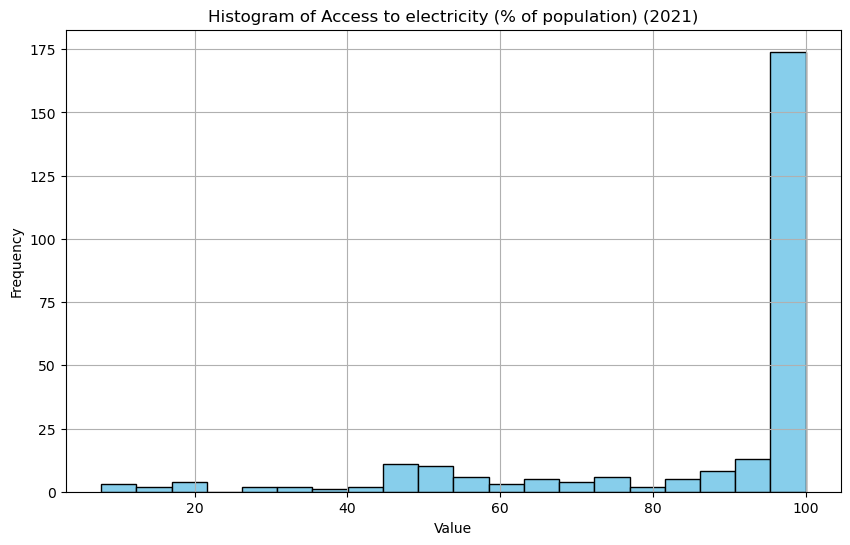

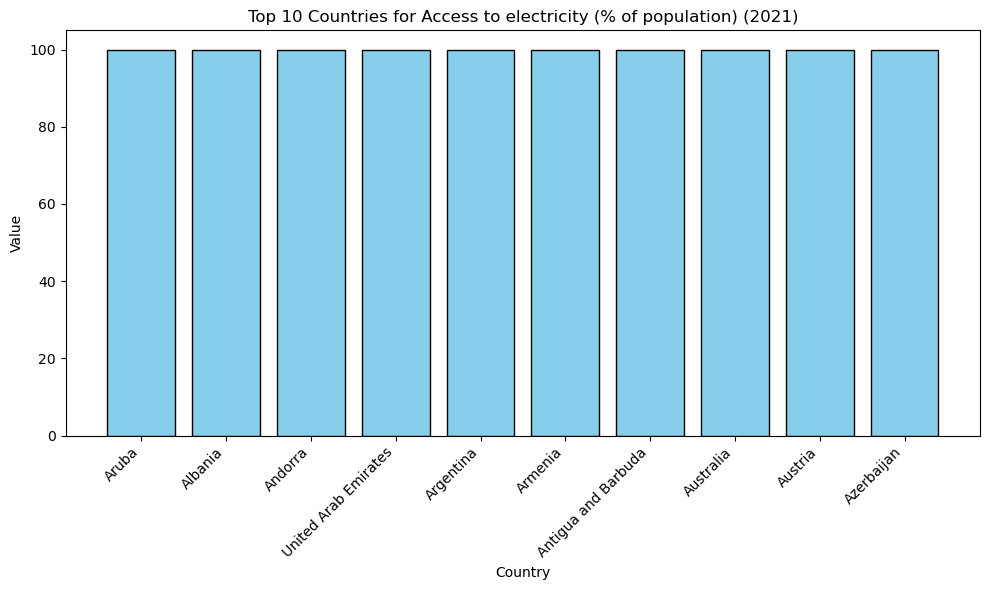

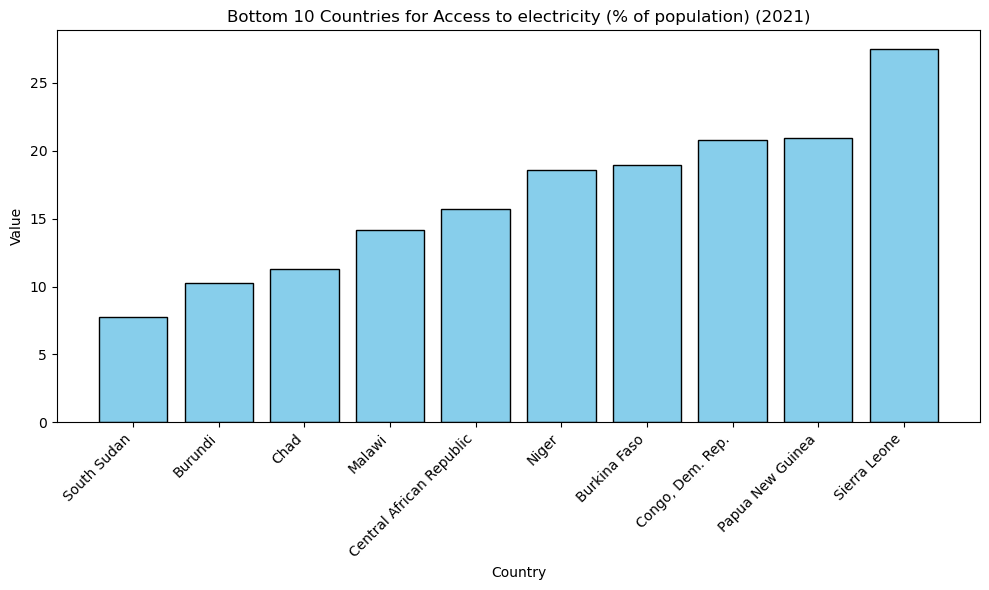

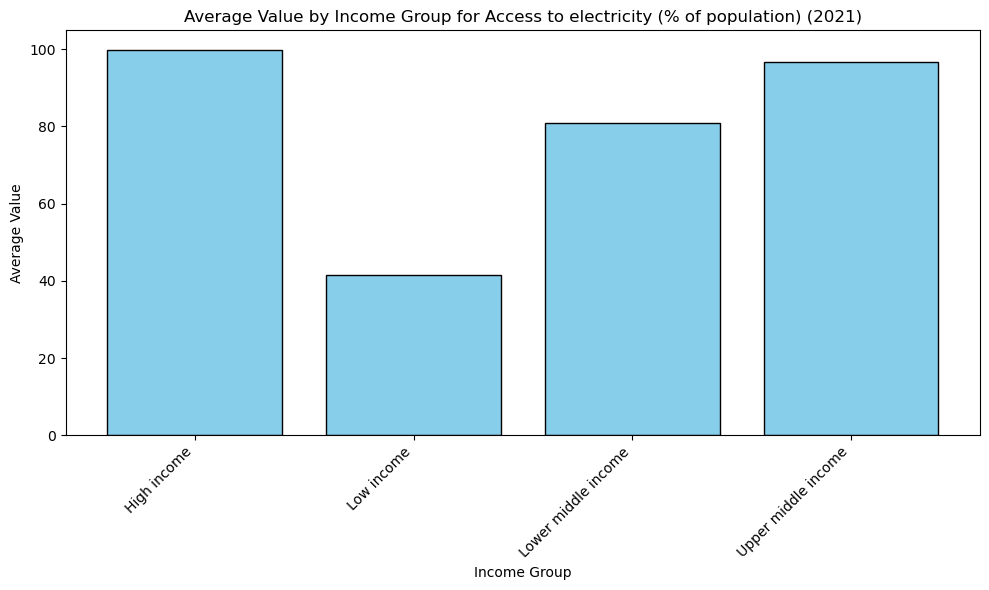

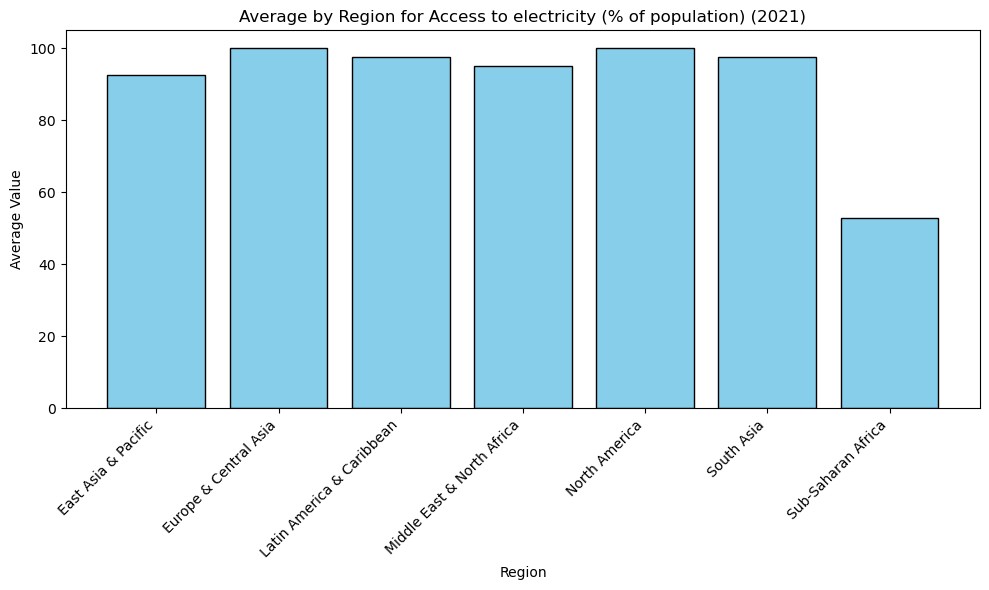

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Function to create a histogram
def create_histogram(data, column_name, title):
    plt.figure(figsize=(10, 6))
    plt.hist(data[column_name], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid()
    plt.show()

# Function to create a bar plot
def create_bar_plot(data, x_column, y_column, xlabel, ylabel, title, rotation=True):
    plt.figure(figsize=(10, 6))
    plt.bar(data[x_column], data[y_column], color='skyblue', edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Function to plot a histogram for a specific year and indicator
def plot_histogram(data, year, indicator_name):
    title = f'Histogram of {indicator_name} ({year})'
    create_histogram(data, year, title)

# Function to plot the top 10 countries for a specific year and indicator
def plot_top_10(data, x_column, year, indicator_name):
    title = f'Top 10 Countries for {indicator_name} ({year})'
    top_countries_data = data.nlargest(10, year)[[x_column, year]]
    create_bar_plot(top_countries_data, x_column, year, 'Country', 'Value', title, rotation=False)

# Function to plot the bottom 10 countries for a specific year and indicator
def plot_bottom_10(data, x_column, year, indicator_name):
    title = f'Bottom 10 Countries for {indicator_name} ({year})'
    bottom_countries_data = data.nsmallest(10, year)[[x_column, year]]
    create_bar_plot(bottom_countries_data, x_column, year, 'Country', 'Value', title, rotation=False)

# Function to plot the average value by income group for a specific year and indicator
def plot_by_income_group(data, country_metadata, x_column, year, indicator_name):
    title = f'Average Value by Income Group for {indicator_name} ({year})'
    income_group_data = data.merge(country_metadata[['Country Code', 'IncomeGroup']], on='Country Code')
    income_group_means = income_group_data.groupby('IncomeGroup')[year].mean().reset_index()
    create_bar_plot(income_group_means, 'IncomeGroup', year, 'Income Group', 'Average Value', title)

# Function to plot the average value by region for a specific year and indicator
def plot_by_region(data, country_metadata, x_column, year, indicator_name):
    title = f'Average by Region for {indicator_name} ({year})'
    region_data = data.merge(country_metadata[['Country Code', 'Region']], on='Country Code')
    region_means = region_data.groupby('Region')[year].mean().reset_index()
    create_bar_plot(region_means, 'Region', year, 'Region', 'Average Value', title)

# Function to read data and visualize it
def read_and_visualize_data(folder_path, data_file, country_metadata_file, indicator_metadata_file, year):
    # Read data from CSV files
    data = pd.read_csv(os.path.join(folder_path, data_file), skiprows=4)
    country_metadata = pd.read_csv(os.path.join(folder_path, country_metadata_file))
    indicator_metadata = pd.read_csv(os.path.join(folder_path, indicator_metadata_file))
    
    # Get the indicator name from metadata
    indicator_name = indicator_metadata['INDICATOR_NAME'][0]
    
    # Plot various visualizations
    plot_histogram(data, year, indicator_name)
    plot_top_10(data, 'Country Name', year, indicator_name)
    plot_bottom_10(data, 'Country Name', year, indicator_name)
    plot_by_income_group(data, country_metadata, 'Country Name', year, indicator_name)
    plot_by_region(data, country_metadata, 'Country Name', year, indicator_name)

# Call the function with the appropriate file paths and year
read_and_visualize_data("DATASETS/Access to electricity (% of population)",
                     "API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     '2021')  # Change to the desired year


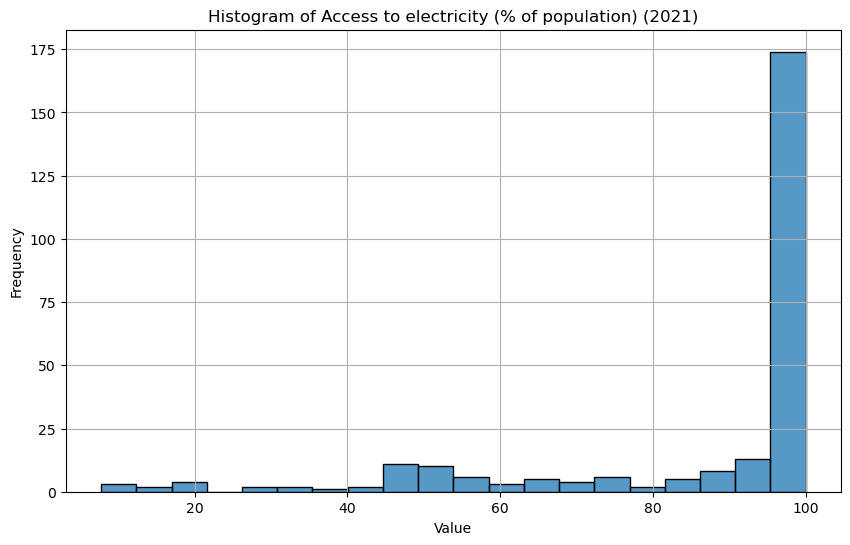

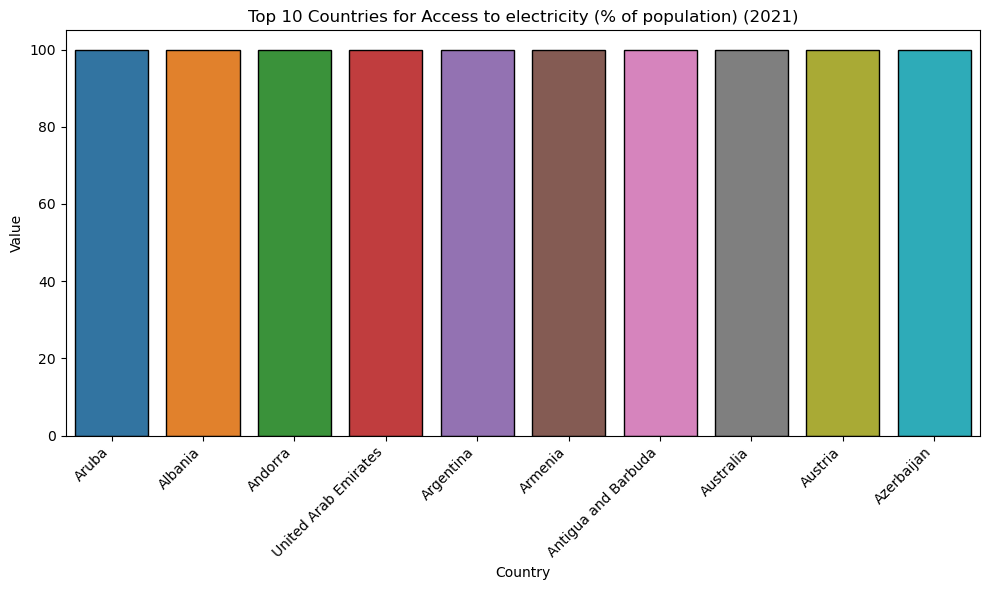

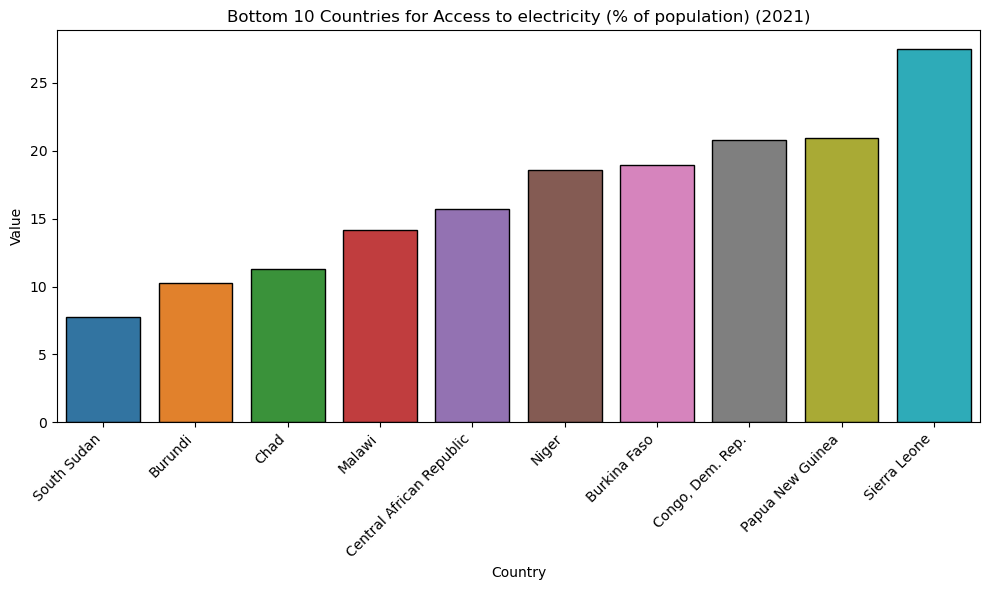

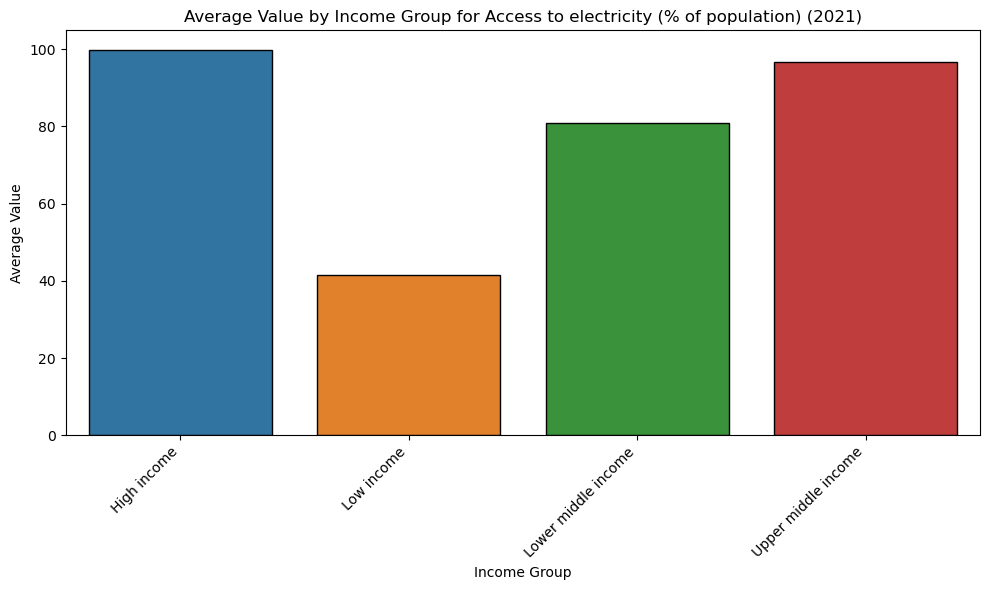

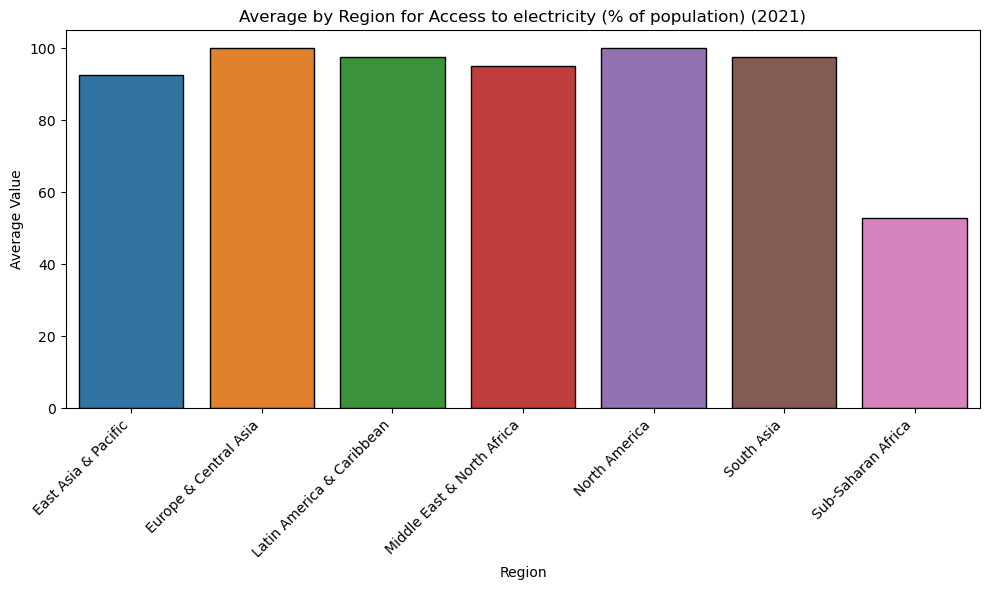

In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create a histogram using Seaborn
def create_histogram(data, column_name, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column_name], bins=20, edgecolor='black')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid()
    plt.show()

# Function to create a bar plot using Seaborn
def create_bar_plot(data, x_column, y_column, xlabel, ylabel, title, rotation=True):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x=x_column, y=y_column, edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Rest of the functions remain the same

# Call the function with the appropriate file paths and year
read_and_visualize_data("DATASETS/Access to electricity (% of population)",
                     "API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     '2021')  # Change to the desired year


In [20]:
import pandas as pd
import os
import plotly.express as px

# Function to create a histogram using Plotly
def create_histogram(data, column_name, title):
    fig = px.histogram(data, x=column_name, nbins=20, title=title)
    fig.show()

# Function to create a bar plot using Plotly with the 'plotly3' color scale
def create_bar_plot(data, x_column, y_column, xlabel, ylabel, title, rotation=True):
    fig = px.bar(data, x=x_column, y=y_column, color=y_column, title=title, color_continuous_scale='plotly3')
    if rotation:
        fig.update_layout(xaxis_tickangle=-45)
    fig.show()

# Rest of the functions remain the same

# Call the function with the appropriate file paths and year
read_and_visualize_data("DATASETS/Access to electricity (% of population)",
                     "API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     '2021')  # Change to the desired year
